In [1]:
import numpy as np
import pandas as pd
import math
import statistics

ModuleNotFoundError: No module named 'numpy'

In [ ]:
#Import data set

data_mentah = pd.read_csv ('D:\SKRIPSI\Data Set\Coba Coba_Kecil.csv')
data = data_mentah
data

,Nama,Mata Kuliah Pilihan 1,Mata Kuliah Pilihan 2,Mata Kuliah Pilihan 3,Mata Kuliah Pilihan 4
0,Jamalia,4,3,5,4
1,Neil,5,3,0,0
2,Xyla,4,3,3,4
3,Juliet,2,1,0,0
4,Gretchen,4,2,0,0
5,Danys,4,3,5,4


In [ ]:
data_mentah_tanpa_nama = data_mentah.drop(['Nama'], axis=1)


In [ ]:
#Membuat Fungsi Proximity/Jarak
def Proximity(rating1,rating2):
    return 1-(1/(1+math.exp(-abs(rating1-rating2))))


#Membuat Fungsi Significance/Signifikansi
def Significance(rating1,rating2):
    range_rating = [1,2,3,4,5]
    r_median = statistics.median(range_rating)
    return 1/(1+math.exp(-abs(rating1-r_median)*abs(rating2-r_median)))


#Membuat Fungsi Singularity/Singularitas
def Singularity(rating1,rating2, iterate):
    rata = data.iloc[:,iterate].mean()
    return 1-(1/(1+math.exp(-abs((rating1+rating2)/2-rata))))

#membuat fungsi untuk menghitung nilai jaccard similarity
def jaccard(student1, student2):
    items_u = set(df.columns[df.loc[student1] > 0])
    items_v = set(df.columns[df.loc[student2] > 0])
    
    intersection = len(items_u.intersection(items_v))
    union = len(items_u.union(items_v))
    
    return intersection / union

In [ ]:
# import pandas as pd

# # Create a sample DataFrame
# data_coba = {'Math': [75, 82, 90, 65],
#         'Science': [88, 92, 78, 72],
#         'History': [63, 75, 80, 88]}

# df = pd.DataFrame(data)

# student1 = 0
# student2 = 1

# items_u = set(df.columns[df.loc[student1] > 70])
# items_v = set(df.columns[df.loc[student2] > 90])
# intersection = (items_u.intersection(items_v))
# union = items_u.union(items_v)

# print(intersection)
# print(union)



In [ ]:
#drop Nama Column
data = data.drop(['Nama'], axis=1)

#drop Mata kuliah 

In [ ]:
import math
import numpy as np

def calculate_PSS_similarity(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]

    if len(ratings1) != len(ratings2):
        return None  # Students have different numbers of ratings
    
    iterate = 0
    PSS = 0
    for col in ratings1.index:
        PSS += Proximity(ratings1[col], ratings2[col])*Significance(ratings1[col], ratings2[col])*Singularity(ratings1[col], ratings2[col], iterate)
        iterate = iterate + 1
    return PSS

def calculate_Jaccard_similarity(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]

    items_u = set(ratings1.index[ratings1 > 0])
    items_v = set(ratings2.index[ratings2 > 0])
    intersection = len(items_u.intersection(items_v))
    union = len(items_u.union(items_v))
    return intersection / union

def calculate_URP_similarity(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]
    
    mean_student1 = statistics.mean(ratings1)
    mean_student2 = statistics.mean(ratings2)
    
    var_student1 = statistics.variance(ratings1)
    var_student2 = statistics.variance(ratings2)
    
    
    return 1-(1/(1+math.exp(-abs(mean_student1-mean_student2)*abs(var_student1-var_student2))))
    


# Calculate similarity between all pairs of students
students = data.index
for i in range(len(students)):
    for j in range(i, len(students)):
        student1 = students[i]
        student2 = students[j]
        similarity = calculate_URP_similarity(student1, student2)
        if similarity is not None:
            print(f"Similarity between {student1} and {student2}: {similarity:.5f}")

Similarity between 0 and 0: 0.50000
Similarity between 0 and 1: 0.00002
Similarity between 0 and 2: 0.45843
Similarity between 0 and 3: 0.30736
Similarity between 0 and 4: 0.00055
Similarity between 0 and 5: 0.50000
Similarity between 1 and 1: 0.50000
Similarity between 1 and 2: 0.00020
Similarity between 1 and 3: 0.00174
Similarity between 1 and 4: 0.23746
Similarity between 1 and 5: 0.00002
Similarity between 2 and 2: 0.50000
Similarity between 2 and 3: 0.16740
Similarity between 2 and 4: 0.00127
Similarity between 2 and 5: 0.45843
Similarity between 3 and 3: 0.50000
Similarity between 3 and 4: 0.11280
Similarity between 3 and 5: 0.30736
Similarity between 4 and 4: 0.50000
Similarity between 4 and 5: 0.00055
Similarity between 5 and 5: 0.50000


In [ ]:
import math
import numpy as np

def calculate_PSS_similarity(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]

    if len(ratings1) != len(ratings2):
        return None  # Students have different numbers of ratings
    
    iterate = 0
    PSS = 0
    for col in ratings1.index:
        PSS += Proximity(ratings1[col], ratings2[col])*Significance(ratings1[col], ratings2[col])*Singularity(ratings1[col], ratings2[col], iterate)
        iterate = iterate + 1
    return PSS

def calculate_Jaccard_similarity(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]

    items_u = set(ratings1.index[ratings1 > 0])
    items_v = set(ratings2.index[ratings2 > 0])
    intersection = len(items_u.intersection(items_v))
    union = len(items_u.union(items_v))
    return intersection / union

def calculate_URP_similarity(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]
    
    mean_student1 = statistics.mean(ratings1)
    mean_student2 = statistics.mean(ratings2)
    
    var_student1 = statistics.variance(ratings1)
    var_student2 = statistics.variance(ratings2)
    
    
    return 1-(1/(1+math.exp(-abs(mean_student1-mean_student2)*abs(var_student1-var_student2))))
    

rows = []
# Calculate similarity between all pairs of students
students = data.index
for i in range(len(students)):
    row_data = []
    for j in range(len(students)):
        student1 = students[i]
        student2 = students[j]
        if student1 == student2:
            similarity = np.nan
        else: 
            similarity = (calculate_PSS_similarity(student1, student2)*
                          calculate_Jaccard_similarity(student1, student2)*
                          calculate_URP_similarity(student1, student2))
        row_data.append(similarity)
    rows.append(row_data)

print(rows)
df_sim = pd.DataFrame(rows)
df_sim.columns = students 
df_sim.index = students

print(df_sim)

[[nan, 2.168857124272343e-06, 0.14382873381866731, 0.009259932382992202, 6.803551297286504e-05, 0.16640090589596246], [2.168857124272343e-06, nan, 1.9463610133266474e-05, 0.00026206512365725736, 0.061400975680789, 2.168857124272343e-06], [0.14382873381866731, 1.9463610133266474e-05, nan, 0.005483406915919697, 0.00015977680604945048, 0.14382873381866731], [0.009259932382992202, 0.00026206512365725736, 0.005483406915919697, nan, 0.02268168327487101, 0.009259932382992202], [6.803551297286504e-05, 0.061400975680789, 0.00015977680604945048, 0.02268168327487101, nan, 6.803551297286504e-05], [0.16640090589596246, 2.168857124272343e-06, 0.14382873381866731, 0.009259932382992202, 6.803551297286504e-05, nan]]
          0         1         2         3         4         5
0       NaN  0.000002  0.143829  0.009260  0.000068  0.166401
1  0.000002       NaN  0.000019  0.000262  0.061401  0.000002
2  0.143829  0.000019       NaN  0.005483  0.000160  0.143829
3  0.009260  0.000262  0.005483       NaN  

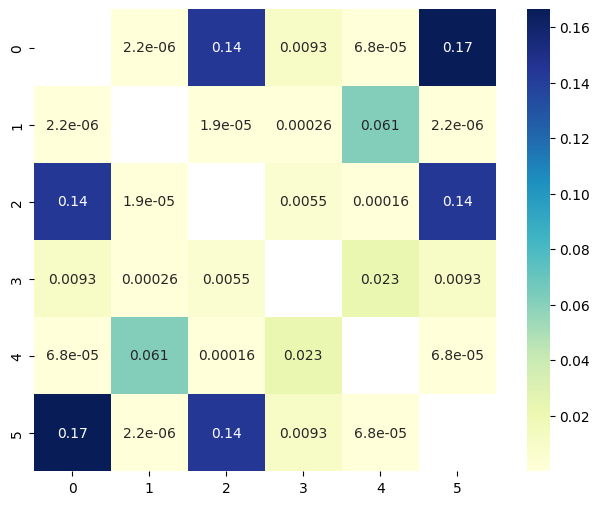

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(df_sim, annot=True, cmap="YlGnBu", square=True)

plt.show()


In [ ]:

data_mentah

,Nama,Mata Kuliah Pilihan 1,Mata Kuliah Pilihan 2,Mata Kuliah Pilihan 3,Mata Kuliah Pilihan 4
0,Jamalia,4,3,5,4
1,Neil,5,3,0,0
2,Xyla,4,3,3,4
3,Juliet,2,1,0,0
4,Gretchen,4,2,0,0
5,Danys,4,3,5,4


In [ ]:
sort_sim = df_sim[1].sort_values(ascending=False)
highest_sim = sort_sim.index.to_list()


item_not_rated = data_mentah_tanpa_nama.loc[1][data_mentah_tanpa_nama.loc[1] == 0].index.to_list()
item_rated = data_mentah_tanpa_nama.loc[1][data_mentah_tanpa_nama.loc[1] != 0].index.to_list()
# item_rated_high_sim = data_mentah_tanpa_nama.loc[highest_sim[0]][data_mentah_tanpa_nama.loc[highest_sim[0]] > 0]
item_rated_high_sim = []
for i in range(6):
    items = data_mentah_tanpa_nama.loc[highest_sim[i]][data_mentah_tanpa_nama.loc[highest_sim[i]] > 0].index.to_list()
    item_rated_high_sim.extend(items)
    

unique_items = list(set(item_rated_high_sim))

recommended_items = set(unique_items) - set(item_rated)

print(item_not_rated)
print(recommended_items)


['Mata Kuliah Pilihan 3', 'Mata Kuliah Pilihan 4']
{'Mata Kuliah Pilihan 3', 'Mata Kuliah Pilihan 4'}


In [ ]:
lists = [
    ['Mata Kuliah Pilihan 1', 'Mata Kuliah Pilihan 2'],
    ['Mata Kuliah Pilihan 1', 'Mata Kuliah Pilihan 2'],
    ['Mata Kuliah Pilihan 1', 'Mata Kuliah Pilihan 2', 'Mata Kuliah Pilihan 3', 'Mata Kuliah Pilihan 4'],
    ['Mata Kuliah Pilihan 1', 'Mata Kuliah Pilihan 2', 'Mata Kuliah Pilihan 3', 'Mata Kuliah Pilihan 4'],
    ['Mata Kuliah Pilihan 1', 'Mata Kuliah Pilihan 2', 'Mata Kuliah Pilihan 3', 'Mata Kuliah Pilihan 4'],
    ['Mata Kuliah Pilihan 1', 'Mata Kuliah Pilihan 2']
]

# Create an empty list to store the combined items
combined_items = []

# Iterate through the lists and add items to the combined_items list
for item_list in lists:
    combined_items.extend(item_list)

# Use a set to ensure uniqueness and then convert it back to a list
unique_items = list(set(combined_items))

print(unique_items)


['Mata Kuliah Pilihan 1', 'Mata Kuliah Pilihan 3', 'Mata Kuliah Pilihan 4', 'Mata Kuliah Pilihan 2']


In [ ]:
import pandas as pd
import math


def calculate_significance(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]

    if len(ratings1) != len(ratings2):
        return None  # Students have different numbers of ratings

    significance_sum = 0
    for col in ratings1.index:
        significance_sum += Significance(ratings1[col], ratings2[col])

    significance = significance_sum
    return significance

# Create a DataFrame from the data dictionary

# Calculate significance between all pairs of students
students = data.index
for i in range(len(students)):
    for j in range(i + 1, len(students)):
        student1 = students[i]
        student2 = students[j]
        significance = calculate_significance(student1, student2)
        if significance is not None:
            print(f"Significance between {student1} and {student2}: {significance:.5f}")


Significance between 0 and 1: 3.33090
Significance between 0 and 2: 2.46212
Significance between 0 and 3: 3.18116
Significance between 0 and 4: 3.18116
Significance between 0 and 5: 2.94413
Significance between 1 and 2: 2.83337
Significance between 1 and 3: 3.38055
Significance between 1 and 4: 3.38055
Significance between 1 and 5: 3.33090
Significance between 2 and 3: 2.68363
Significance between 2 and 4: 2.68363
Significance between 2 and 5: 2.46212
Significance between 3 and 4: 3.61161
Significance between 3 and 5: 3.18116
Significance between 4 and 5: 3.18116


In [ ]:
ratings1 = data.iloc[:,0]
ratings1

0    4
1    5
2    4
3    2
4    4
5    4
Name: Mata Kuliah Pilihan 1, dtype: int64

In [ ]:
# ratings1 = data.loc[1]
# ratings2 = data.loc[2]

# Singularity_sum = 0
# iterate = 0
# for col in ratings1.index:
    
#     Singularity_sum += Singularity(ratings1[col], ratings2[col], iterate)
#     iterate = iterate + 1  
    

In [ ]:
import pandas as pd
import math


def Singularity(rating_a,rating_b,iterate):
    rata = data.iloc[:,iterate].mean()
    return 1-(1/(1+math.exp(-abs(((rating_a+rating_b)/2)-rata))))

def calculate_singularity(student1, student2):
    ratings1 = data.iloc[student1]
    ratings2 = data.iloc[student2]
    
    
    if len(ratings1) != len(ratings2):
        return None  # Students have different numbers of ratings

    Singularity_sum = 0
    iterate = 0
    for col in ratings1.index:
        Singularity_sum += Singularity(ratings1[col], ratings2[col],iterate)
        iterate = iterate + 1
        
    singularity = Singularity_sum
    return singularity

# Create a DataFrame from the data dictionary


# Calculate Singularity between all pairs of students
students = data.index
for i in range(len(students)):
    for j in range(i + 1, len(students)):
        student1 = students[i]
        student2 = students[j]
        singularity = calculate_singularity(student1, student2 )
        if singularity is not None:
            print(f"Singularity between {student1} and {student2}: {singularity:.5f}")


Singularity between 0 and 1: 1.63421
Singularity between 0 and 2: 1.09301
Singularity between 0 and 3: 1.59791
Singularity between 0 and 4: 1.87586
Singularity between 0 and 5: 1.01072
Singularity between 1 and 2: 1.55603
Singularity between 1 and 3: 1.01696
Singularity between 1 and 4: 1.06123
Singularity between 1 and 5: 1.63421
Singularity between 2 and 3: 1.51973
Singularity between 2 and 4: 1.79767
Singularity between 2 and 5: 1.09301
Singularity between 3 and 4: 0.79387
Singularity between 3 and 5: 1.59791
Singularity between 4 and 5: 1.87586


In [ ]:
import pandas as pd
import math
import statistics

data = {
    'Mata Kuliah Pilihan 1': [4, 5, 4, 2, 4],
    'Mata Kuliah Pilihan 2': [3, 3, 3, 1, 2],
    'Mata Kuliah Pilihan 3': [5, 0, 3, 0, 0],
    'Mata Kuliah Pilihan 4': [4, 0, 4, 0, 0],
}

range_rating = [1, 2, 3, 4, 5]
r_median = statistics.median(range_rating)

def Proximity(rating1,rating2):
    return 1-(1/(1+math.exp(-abs(rating1-rating2))))

def Significance(rating1,rating2):
    range_rating = [1,2,3,4,5]
    r_median = statistics.median(range_rating)
    return 1/(1+math.exp(-abs(rating1-r_median)*abs(rating2-r_median)))

def Singularity(rating1,rating2, iterate):
    rata = data.iloc[:,iterate].mean()
    return 1-(1/(1+math.exp(-abs((rating1+rating2)/2-rata))))

def combine_scores(similarity, significance, singularity):
    return similarity * significance * singularity

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)


def calculate_similarity(student1, student2):
    ratings1 = data.loc[student1]
    ratings2 = data.loc[student2]

    if len(ratings1) != len(ratings2):
        return None  # Students have different numbers of ratings

    PSS = 0
    for col in ratings1.index:
        PSS += Proximity(ratings1[col], ratings2[col]) * Significance(ratings1[col], ratings2[col]) * Singularity(ratings1[col], ratings2[col])

    return PSS


# Calculate similarity between all pairs of students
students = data.index
for i in range(len(students)):
    for j in range(i, len(students)):
        student1 = students[i]
        student2 = students[j]
        similarity = calculate_similarity(student1, student2)
        if similarity is not None:
            print(f"Similarity between {student1} and {student2}: {similarity:.5f}")

AttributeError: 'dict' object has no attribute 'index'